#LeNet5 on MNIST with Adam
###Effect of training loss vs. Batch size for a fixed learning rate
###Effect of training loss vs. Learning rate for a fixed Batch size

In [0]:
%matplotlib inline
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
import torch.optim as optim

In [0]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 

trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range {-90,90}
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

In [3]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))

No. of samples in train set: 60000
No. of samples in test set: 10000


In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [5]:
use_gpu = torch.cuda.is_available()
net = LeNet()
print(net)
if use_gpu:
    print('GPU is available!')
    net = net.cuda()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
GPU is available!


Epoch 1/10 : Training loss: 24.9128 | Training Accuracy: 10.1867
Epoch 2/10 : Training loss: 2.3168 | Training Accuracy: 10.3667
Epoch 3/10 : Training loss: 2.3170 | Training Accuracy: 10.1583
Epoch 4/10 : Training loss: 2.3173 | Training Accuracy: 10.2750
Epoch 5/10 : Training loss: 2.3186 | Training Accuracy: 10.3000
Epoch 6/10 : Training loss: 2.3188 | Training Accuracy: 10.3633
Epoch 7/10 : Training loss: 2.3168 | Training Accuracy: 10.3817
Epoch 8/10 : Training loss: 2.3181 | Training Accuracy: 10.2483
Epoch 9/10 : Training loss: 2.3168 | Training Accuracy: 10.2917
Epoch 10/10 : Training loss: 2.3173 | Training Accuracy: 10.3817
Epoch 1/10 : Training loss: 16.1431 | Training Accuracy: 10.4350
Epoch 2/10 : Training loss: 2.3089 | Training Accuracy: 10.3683
Epoch 3/10 : Training loss: 2.3106 | Training Accuracy: 10.1417
Epoch 4/10 : Training loss: 2.3118 | Training Accuracy: 10.1683
Epoch 5/10 : Training loss: 2.3120 | Training Accuracy: 10.4033
Epoch 6/10 : Training loss: 2.3124 | 

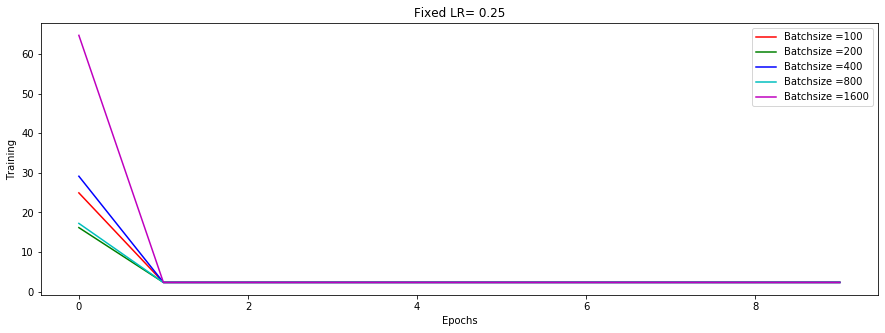

In [6]:
#FIXED LEARNING RATE
from cycler import cycler

num_epochs = 10
BatchSize = 50

fig = plt.figure(figsize=[15,5]) 

for k in range(5):
    net = LeNet()
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.Adam(net.parameters(), lr=0.25)
    learning_rate = 0.1
    train_loss = []
    train_acc = []
    
    
    apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
    BatchSize = BatchSize*2 

    trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
    trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
    testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
    testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader
    
    for epoch in range(num_epochs):
    
        running_loss = 0.0 
        running_corr = 0
        
        for i,data in enumerate(trainLoader):
            inputs,labels = data
            
        # Initializing model gradients to zero
            optimizer.zero_grad() 
        # Data feed-forward through the network
            outputs = net(inputs)
        # Predicted class is the one with maximum probability
            preds = torch.argmax(outputs,dim=1)
        # Finding the loss
            loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
            running_loss += loss 
        # Accumulate number of correct predictions
            running_corr += torch.sum(preds==labels)    
            loss.backward()
            optimizer.step()
    
        # Updating the model parameters
        epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
        epoch_acc = running_corr.item()/60000
    
        train_loss.append(epoch_loss) 
        train_acc.append(epoch_acc) 
        print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))       
        
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c','m','y','k','w'])))
    plt.plot(range(num_epochs),train_loss,label='Batchsize ={:.0f}'.format(BatchSize)) 
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Training')
    plt.title("Fixed LR= 0.25")
plt.show()
        


Epoch 1/10 : Training loss: 2.3281 | Training Accuracy: 10.7200
Epoch 2/10 : Training loss: 2.3045 | Training Accuracy: 10.6000
Epoch 3/10 : Training loss: 2.3048 | Training Accuracy: 10.4650
Epoch 4/10 : Training loss: 2.3047 | Training Accuracy: 10.6150
Epoch 5/10 : Training loss: 2.3047 | Training Accuracy: 10.6600
Epoch 6/10 : Training loss: 2.3047 | Training Accuracy: 10.7283
Epoch 7/10 : Training loss: 2.3047 | Training Accuracy: 10.5283
Epoch 8/10 : Training loss: 2.3047 | Training Accuracy: 10.5767
Epoch 9/10 : Training loss: 2.3050 | Training Accuracy: 10.7200
Epoch 10/10 : Training loss: 2.3053 | Training Accuracy: 10.5850
Epoch 1/10 : Training loss: 2.4462 | Training Accuracy: 10.3400
Epoch 2/10 : Training loss: 2.3080 | Training Accuracy: 10.6100
Epoch 3/10 : Training loss: 2.3082 | Training Accuracy: 10.3717
Epoch 4/10 : Training loss: 2.3079 | Training Accuracy: 10.4633
Epoch 5/10 : Training loss: 2.3077 | Training Accuracy: 10.4750
Epoch 6/10 : Training loss: 2.3083 | Tr

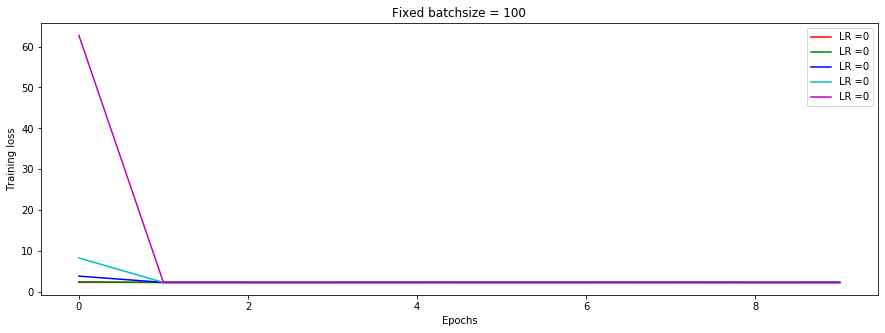

In [7]:
#FIXED BATCH SIZE

from cycler import cycler

num_epochs = 10
BatchSize = 100
learn = 0.05
fig = plt.figure(figsize=[15,5]) 

for k in range(5):
    net = LeNet()
    criterion = nn.CrossEntropyLoss()

    optimizer = optim.Adam(net.parameters(), lr=learn)
    learn = learn + 0.05
    learning_rate = 0.1
    train_loss = []
    train_acc = []
    
    
    apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
     # change according to system specs

    trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
    trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
    testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
    testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader
    
    for epoch in range(num_epochs):
    
        running_loss = 0.0 
        running_corr = 0
        
        for i,data in enumerate(trainLoader):
            inputs,labels = data

        # Initializing model gradients to zero
            optimizer.zero_grad() 
        
        # Data feed-forward through the network
            outputs = net(inputs)
        # Predicted class is the one with maximum probability
            preds = torch.argmax(outputs,dim=1)
        # Finding the loss
            loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
            running_loss += loss 
        # Accumulate number of correct predictions
            running_corr += torch.sum(preds==labels)    
            loss.backward()
            optimizer.step()
        
    
    # Calculating gradients
    
    # Updating the model parameters
    
        
        epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
        epoch_acc = running_corr.item()/60000

        train_loss.append(epoch_loss) 
        train_acc.append(epoch_acc) 
        print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))       
        
    plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','c','m','y','k','w'])))
    plt.plot(range(num_epochs),train_loss,label='LR ={:.000f}'.format(learn)) 
    plt.legend(loc='upper right')
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.title("Fixed batchsize = 100")
plt.show()
